In [5]:
import pandas as pd    ##data handling
import numpy          ##numerical python  in mathematical calc
from sklearn import svm      ## proving us regarding algorithm
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data_arrhythmia.csv')

In [3]:
data.head()

,Age,Sex,Height,Weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


In [4]:
data["diagnosis"].unique()

array([ 8,  6, 10,  1,  7, 14,  3, 16,  2,  4,  5,  9, 15], dtype=int64)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Columns: 280 entries, Age to diagnosis
dtypes: float64(121), int64(159)
memory usage: 2.9 MB


In [6]:
data.describe()

,Age,Sex,Height,Weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
count,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,...,1356.000000,1356.000000,1356.000000,1356.000000,1356.0,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.454474,0.497587,37.142898,16.578554,15.353051,44.809176,33.360774,35.606765,25.807576,45.397893,...,0.548471,3.470298,2.000951,0.050081,0.0,0.347274,1.424999,13.493952,18.480273,4.403843
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


# PRE PROCESSING DATA (Removing Missing & NaN values)

In [4]:
data = data.fillna(data.mean())

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Columns: 280 entries, Age to diagnosis
dtypes: float64(121), int64(159)
memory usage: 2.9 MB


In [9]:
data.isnull().sum()

Age             0
Sex             0
Height          0
Weight          0
qrs_duration    0
               ..
LD              0
LE              0
LF              0
LG              0
diagnosis       0
Length: 280, dtype: int64

In [10]:
X = data.iloc[:,:-1]
#create feature matrix
#reader=csv.reader(open("feature.csv","r"),delimiter=",")
#X=list(reader)
X=numpy.array(X)
X=X.astype(numpy.float)

y = data.iloc[:,-1]
#create result vector
#reader=csv.reader(open("target_output.csv","r"),delimiter=",")
#y=list(reader)
y=numpy.array(y)
y=y.astype(numpy.int)


In [11]:
#applying random forests to get pricipal attributes
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y.ravel())
#print(model.feature_importances_)

numpy.savetxt("randforrests.csv", model.feature_importances_, fmt='%s', delimiter=",")

#selecting features 
c=0;
important_features=numpy.zeros((278),dtype=numpy.float)
important_features_index=numpy.zeros((278),dtype=numpy.int)

for i in range (0,278):
    if((model.feature_importances_[i]*1000)>=4.5):
        important_features[c]=model.feature_importances_[i]
        important_features_index[c]=i
        c=c+1

print(important_features)
print(important_features_index)
print("The no of features =",c)

#features are reduced  from 278

numpy.savetxt("import_features_index_after_random_forrests.csv",important_features_index, fmt='%s', delimiter=",")

#new matrix compirising of reduced features
newX=numpy.zeros((1356 ,c),dtype=numpy.float)
for i in range (0,1356 ):
    for j in range (0,c):
        newX[i][j]=X[i][important_features_index[j]]


print(newX)

numpy.savetxt("reduced_features.csv",newX, fmt='%s', delimiter=",")

[0.00618977 0.00534867 0.00451503 0.01135785 0.0052884  0.0070078
 0.00573896 0.00554078 0.00451229 0.00840823 0.00600679 0.00468233
 0.02053033 0.006545   0.00733603 0.00469821 0.00458125 0.0065223
 0.00476886 0.00556028 0.00525373 0.00677744 0.00679285 0.00488246
 0.0082932  0.0053936  0.00595523 0.02726604 0.02171889 0.0055958
 0.00484269 0.00675153 0.01225394 0.00635335 0.01040613 0.01038805
 0.00764203 0.00723264 0.00461319 0.00635711 0.00557315 0.0045333
 0.00569379 0.00527683 0.00508675 0.00634488 0.00494934 0.00556462
 0.00484281 0.00560243 0.01012654 0.00529979 0.00516809 0.00604463
 0.00530303 0.00621631 0.00744437 0.00617294 0.00713658 0.0058719
 0.00614902 0.01505289 0.00675544 0.00554156 0.00502731 0.00599782
 0.00459249 0.00921747 0.00458273 0.00551114 0.00546344 0.00587712
 0.01244858 0.00529204 0.00607386 0.00860613 0.00771429 0.0051583
 0.00718984 0.00647496 0.00632726 0.004874   0.0066828  0.00733623
 0.00483814 0.00592686 0.00493296 0.00642211 0.00558905 0.00697472
 

In [12]:
x = pd.read_csv('reduced_features.csv')

In [13]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(x,y[:-1],test_size=0.2,random_state=100)

# KNN classifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors=13)

clf_KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [15]:
y_pred_knn  = clf_KNN.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_knn,y_test))
score_knn = accuracy_score(y_pred_knn,y_test)

0.5276752767527675


# SVM classifier 

In [17]:
clf_SVM = svm.SVC(C=1,kernel="linear")
clf_SVM.fit(X_train,y_train)

SVC(C=1, kernel='linear')

In [18]:
y_pred_svm  = clf_SVM.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_svm,y_test))
score_svm = accuracy_score(y_pred_svm,y_test)

0.977859778597786


# Logistic Regression

In [20]:

clf_LR = LogisticRegression(max_iter=100,C=1)
clf_LR.fit(X_train,y_train)

LogisticRegression(C=1)

In [21]:
y_pred_LR  = clf_LR.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_LR,y_test))
score_lr = accuracy_score(y_pred_LR,y_test)

0.6014760147601476


# Navie Bayes 

In [23]:
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)

GaussianNB()

In [24]:
y_pred_NB = clf_NB.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_NB,y_test))
score_nb = accuracy_score(y_pred_NB,y_test)

0.11808118081180811


# Weigth KNN 

In [26]:
from sklearn.neighbors import KNeighborsClassifier
clf_WKNN = KNeighborsClassifier(n_neighbors=13,weights='distance')
clf_WKNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13, weights='distance')

In [27]:
y_pred_WKNN = clf_WKNN.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_WKNN,y_test))
score_wknn = accuracy_score(y_pred_WKNN,y_test)

0.988929889298893


In [29]:
from sklearn.tree import DecisionTreeClassifier
DT= DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [30]:
scores = [score_knn,score_svm,score_lr,score_nb,score_wknn]
algorithms = ["KNN","Support Vector Machine","Logistic regression","naviebayes","Weigthed - knn"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using KNN is: 0.5276752767527675 %
The accuracy score achieved using Support Vector Machine is: 0.977859778597786 %
The accuracy score achieved using Logistic regression is: 0.6014760147601476 %
The accuracy score achieved using naviebayes is: 0.11808118081180811 %
The accuracy score achieved using Weigthed - knn is: 0.988929889298893 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

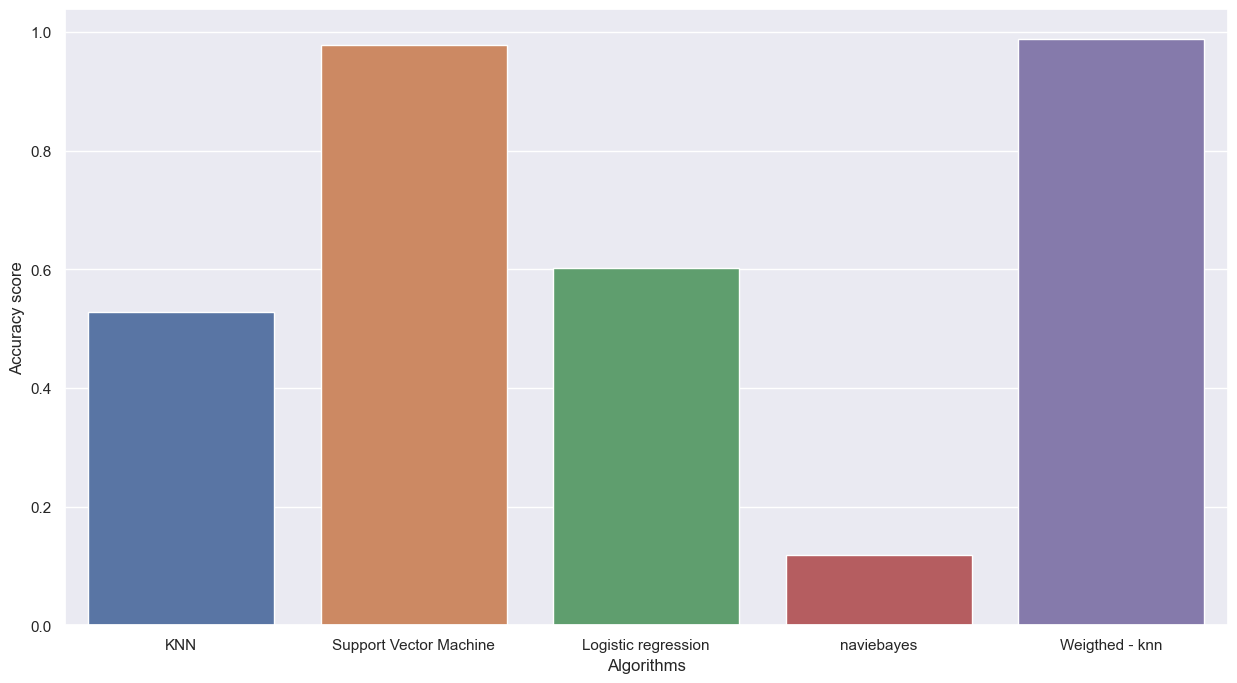

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(algorithms,scores)